# 1.0 - IMPORTS

## 1.1 - LIBRARIES

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import inflection
import matplotlib.pyplot as plt

## 1.2 - LOAD DATA

In [32]:
df_raw = pd.read_csv('../dataset/zomato.csv', low_memory=False, encoding='ISO-8859-1')

## 1.3 - HELPER FUNCTIONS

### 1.3.1 - RENAME COLUMNS FUNCTION

In [33]:
def rename_columns(column_name):
    words = column_name.split()
    return '_'.join(words).lower()

### 1.3.2 - NA VOLUMETRY

In [34]:
def na_volumetry(df):

    df_na = pd.DataFrame()
    df_na['attributes'] = df.columns
    df_na['quantity'] = ''
    df_na['percentual'] = ''

    for i in df_na.index:
        df_na.quantity[i]    = df[df_na['attributes'][i]].isna().sum()
        df_na.percentual[i]  = (df[df_na['attributes'][i]].isna().sum()/df['restaurant_id'].count())*100
    
    return df_na

### 1.3.3 - OUTLIERS VOLUMETRY

In [35]:
# Creating the subplots for the dashbord of the boxplot
def outliers_volumetry(df):
    
    df_num = pd.DataFrame()
    df_num = df.select_dtypes(exclude = 'object')
    outlier = []

    for i in df_num.columns:
        q1 = np.quantile(df_num[i], 0.25)
        q3 = np.quantile(df_num[i], 0.75)
        interquartile_distance = q3 - q1
        upper_limit = q3 + 1.5 * interquartile_distance
        lower_limit = q1 - 1.5 * interquartile_distance
        outliers = 0
        for j in df_num.index:
            if df_num[i][j] > upper_limit:
                outliers = outliers + 1
            elif df_num[i][j] < lower_limit:
                outliers = outliers + 1
            else:
                pass

        outlier.append(outliers)

    df_outlier = pd.DataFrame()
    df_outlier['attributes']    = df_num.columns
    df_outlier['quantity']      =   outlier
    df_outlier['percentual']    =   (outlier/df_num['restaurant_id'].count())*100

    return df_outlier 


def boxplot_volumetry(df):

    df_numerical = df.select_dtypes(exclude = 'object')
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Volumetry of Outliers", fontsize=18)

    # loop through the length of pointer and keep track of index
    for n, pointer in enumerate(df_numerical.columns):
        
        # add a new subplot iteratively
        ax = plt.subplot(5, 3, n + 1)

        # create a boxplot for the pointer on the new subplot axis
        df_numerical[pointer].plot(kind='box', ax=ax)

        # chart formatting
        ax.set_title(pointer.upper())
        ax.set_xlabel("")

    return plt.show()

### 1.3.4 - PLOT DIMENSIONS

In [36]:
sns.set(rc = {'figure.figsize':(13,5)})

# 2.0 - DATA CLEANING

In [37]:
#Making a copy of the dataframe
df2 = df_raw.copy()

## 2.1 - DATA DIMENSION

In [38]:
#Varying the dataframe dimensions and the amount of unique data for each feature
unique_data = df2.apply(lambda x: x.nunique())
rows = df2.shape[0]
cols = df2.shape[1]
print('The Dataset have {} columns and {} rows'.format(cols, rows))
print('\nAmount of unique data for data feature:\n\n{}'.format(unique_data))

The Dataset have 21 columns and 9551 rows

Amount of unique data for data feature:

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64


## 2.2 - RENAME COLUMNS

In [39]:
#Applying snake case pattern to columns through a function determined in subsession 1.3.1
df2.columns = [rename_columns(columns) for columns in df2.columns]
df2.columns


Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')

## 2.3 - DATA TYPES

In [40]:
#Checking if the variable types are correct
df2.dtypes

restaurant_id             int64
restaurant_name          object
country_code              int64
city                     object
address                  object
locality                 object
locality_verbose         object
longitude               float64
latitude                float64
cuisines                 object
average_cost_for_two      int64
currency                 object
has_table_booking        object
has_online_delivery      object
is_delivering_now        object
switch_to_order_menu     object
price_range               int64
aggregate_rating        float64
rating_color             object
rating_text              object
votes                     int64
dtype: object

## 2.4 - NA VOLUMETRY

In [41]:
#Checking the volume of NAN data in the database
df2.isna().sum()

restaurant_id           0
restaurant_name         0
country_code            0
city                    0
address                 0
locality                0
locality_verbose        0
longitude               0
latitude                0
cuisines                9
average_cost_for_two    0
currency                0
has_table_booking       0
has_online_delivery     0
is_delivering_now       0
switch_to_order_menu    0
price_range             0
aggregate_rating        0
rating_color            0
rating_text             0
votes                   0
dtype: int64

We will exclude this NA data as it represents less than 0.9% of the base. In addition to being categorical data, it causes inconsistency in the correlation of analyzes carried out subsequently

In [42]:
#Using the 'na_volumetry' function, checking the total amount of NA and how much this amount represents as a percentage of data
na_volumetry(df2)

,attributes,quantity,percentual
0,restaurant_id,0,0.0
1,restaurant_name,0,0.0
2,country_code,0,0.0
3,city,0,0.0
4,address,0,0.0
5,locality,0,0.0
6,locality_verbose,0,0.0
7,longitude,0,0.0
8,latitude,0,0.0
9,cuisines,9,0.094231


In [43]:
df2 = df2.dropna(subset=['cuisines'])

## 2.5 - NULL VOLUMETRY

In [44]:
#Checking the volume of NULL data in the database
df2.isnull().sum()

restaurant_id           0
restaurant_name         0
country_code            0
city                    0
address                 0
locality                0
locality_verbose        0
longitude               0
latitude                0
cuisines                0
average_cost_for_two    0
currency                0
has_table_booking       0
has_online_delivery     0
is_delivering_now       0
switch_to_order_menu    0
price_range             0
aggregate_rating        0
rating_color            0
rating_text             0
votes                   0
dtype: int64

## 2.6 - DUPLICATED VOLUMETRY

In [45]:
##Checking the volume of Duplicate data in the database
duplicated = df2[df2.duplicated()]
print(duplicated)

Empty DataFrame
Columns: [restaurant_id, restaurant_name, country_code, city, address, locality, locality_verbose, longitude, latitude, cuisines, average_cost_for_two, currency, has_table_booking, has_online_delivery, is_delivering_now, switch_to_order_menu, price_range, aggregate_rating, rating_color, rating_text, votes]
Index: []

[0 rows x 21 columns]


## 2.7 - OUTLIERS VOLUMETRY

In [46]:
#Using the 'outliers_volumetry' function in subsection 1.3.3, checking the total amount of outliers and how much this amount represents as a percentage of data
outliers_volumetry(df2)

,attributes,quantity,percentual
0,restaurant_id,0,0.000000
1,country_code,890,9.327185
2,longitude,1944,20.373087
3,latitude,1974,20.687487
4,average_cost_for_two,853,8.939426
5,price_range,586,6.141270
6,aggregate_rating,2148,22.511004
7,votes,1131,11.852861


We will keep the outliers, as in addition to representing a low percentage in the base, contextually they make sense for the feature that represents them.

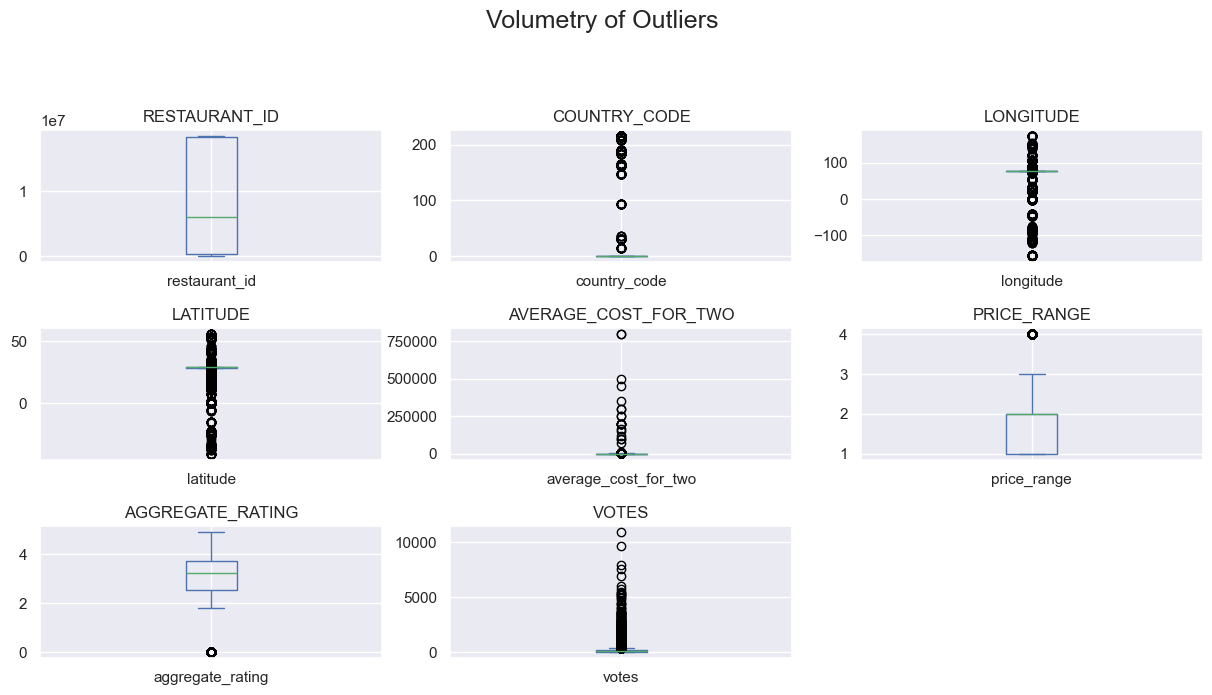

In [47]:
#Plotting outliers using a function also contained in subsection 1.3.3
boxplot_volumetry(df2)

# 3.0 - DESCRIPTIVE STATISTICS

In [48]:
df3 = df2.copy()

In [49]:
df2_num = pd.DataFrame()
df2_cat = pd.DataFrame()

df2_num = df2.select_dtypes(exclude = 'object')
df2_cat = df2.select_dtypes(include = 'object')

# Tendence central:
# - Mean
# - Median

central_tendence1 = pd.DataFrame(df2_num.apply(lambda x: np.mean(x))).T
central_tendence2 = pd.DataFrame(df2_num.apply(lambda x: np.median(x))).T

# Dispersion:
# - Max
# - Min
# - Range
# - Standart Deviation
# - Skew
# - Kurtosis

dispersion1 = pd.DataFrame(df2_num.apply(lambda x: np.std(x))).T
dispersion2 = pd.DataFrame(df2_num.apply(min)).T
dispersion3 = pd.DataFrame(df2_num.apply(max)).T
dispersion4 = pd.DataFrame(df2_num.apply(lambda x: x.min() - x.max())).T
dispersion5 = pd.DataFrame(df2_num.apply(lambda x: x.skew())).T
dispersion6 = pd.DataFrame(df2_num.apply(lambda x: x.kurtosis())).T

# Concatenating the dataframes

metrics = pd.concat([central_tendence1, central_tendence2, dispersion1, dispersion2, dispersion3, dispersion4, dispersion5, dispersion6]).T.reset_index()
metrics.columns = ['attribuites', 'mean', 'median', 'standart deviation', 'min', 'max', 'range', 'skew', 'kurtosis']
metrics

,attribuites,mean,median,standart deviation,min,max,range,skew,kurtosis
0,restaurant_id,9.043301e+06,6.002726e+06,8.791507e+06,53.000000,1.850065e+07,-1.850060e+07,0.063496,-1.950750
1,country_code,1.817921e+01,1.000000e+00,5.644864e+01,1.000000,2.160000e+02,-2.150000e+02,3.064922,7.523150
2,longitude,6.427500e+01,7.719203e+01,4.119544e+01,-157.948486,1.748321e+02,-3.327806e+02,-2.819828,8.330206
3,latitude,2.584853e+01,2.857044e+01,1.100952e+01,-41.330428,5.597698e+01,-9.730741e+01,-3.081780,12.525761
4,average_cost_for_two,1.200326e+03,4.000000e+02,1.612790e+04,0.000000,8.000000e+05,-8.000000e+05,35.461264,1494.371209
5,price_range,1.804968e+00,2.000000e+00,9.055156e-01,1.000000,4.000000e+00,-3.000000e+00,0.889879,-0.141135
6,aggregate_rating,2.665238e+00,3.200000e+00,1.516508e+00,0.000000,4.900000e+00,-4.900000e+00,-0.953052,-0.584832
7,votes,1.567721e+02,3.100000e+01,4.301808e+02,0.000000,1.093400e+04,-1.093400e+04,8.813270,128.316022


# 4.0 - FEATURE ENGINEERING

In [50]:
#Making a copy of the dataframe
df4 = df3.copy()

In [51]:
#Creating a new feature to identify the country
countries = {1: "India", 14: "Australia", 30: "Brazil", 37: "Canada", 94: "Indonesia", 148: "New Zeland", 162: "Philippines",166: "Qatar", 184: "Singapure", 
             189: "South Africa", 191: "Sri Lanka", 208: "Turkey", 214: "United Arab Emirates", 215: "England", 216: "United States of America",
}

df4['countries'] = df4['country_code'].map(countries)
df4.drop(columns = ['country_code'], axis = 1, inplace = True)

In [52]:
#Creating a new feature to identify the color for grouping on the map using the folium library in subsequent graphical analyzes
colors = {"Dark Green":"3F7E00", "Green":"5BA829", "Yellow":"CDD614", "Orange":"FF7800", "White":"FFFCFA", "Red":"E6002A"}
df4['color_code'] = df4['rating_color'].map(colors)
#df4.drop(columns = ['rating_color'], axis = 1, inplace = True)


In [53]:
#Deleting some redundant columns that do not add value in the analysis
df4.drop(columns = ['locality', 'locality_verbose', 'switch_to_order_menu'], axis = 1, inplace = True)

In [54]:
#modifying the 'Price Range' to a categorical variable
df4['price_range'] = df4['price_range'].astype(str)
df4['price_range'] = df4['price_range'].apply(lambda x: 'cheap' if x == '1' else 'normal' if x == '2' else 'expensive' if x == '3' else 'gourmet')

In [55]:
#Renaming the column to improve the context of the data it indicates
df4.rename({'is_delivering_now': 'makes_deliveries'}, axis = 1, inplace = True)

In [56]:
df4.columns

Index(['restaurant_id', 'restaurant_name', 'city', 'address', 'longitude',
       'latitude', 'cuisines', 'average_cost_for_two', 'currency',
       'has_table_booking', 'has_online_delivery', 'makes_deliveries',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes', 'countries', 'color_code'],
      dtype='object')

In [57]:
new_order = ['restaurant_id', 'restaurant_name', 'countries', 'city', 'address', 'longitude',
       'latitude', 'cuisines', 'average_cost_for_two', 'currency', 'has_table_booking', 'has_online_delivery', 
       'makes_deliveries', 'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes', 'color_code']

df4 = df4[new_order]

# 5.0 - EXPLORATORY DATA ANALYSIS (EDA)

In [58]:
#Making a copy of the dataframe
df5 = df4.copy()

In [98]:
df5.sample(3).T

,7688,6797,8081
restaurant_id,8215,18219526,311698
restaurant_name,Mandrain,High On Burgers,Green Chick Chop
countries,India,India,India
city,New Delhi,New Delhi,Noida
address,"Food Court, V3S Mall, Laxmi Nagar, New Delhi","Shop 1, C-61/2, Arjun Nagar, Safdarjung Enclav...","56, Block I, Ganga Shopping Complex, Sector 29..."
longitude,77.287026,77.199188,77.335583
latitude,28.636982,28.560579,28.567448
cuisines,Chinese,Fast Food,"Raw Meats, North Indian, Fast Food"
average_cost_for_two,450,300,350
currency,Indian Rupees(Rs.),Indian Rupees(Rs.),Indian Rupees(Rs.)


## 5.1 - UNIVARIATE ANALYSIS

### 5.1.1 - HOW MANY COUNTRIES IN THE BASE

In [71]:
country = df5['countries'].nunique()
print('The current base has {} countries'.format(country))

The current base has 15 countries


### 5.1.2 - HOW MANY CITIES IN THE BASE

In [73]:
cities = df5['city'].nunique()
print('The current base has {} cities'.format(cities))

The current base has 140 cities


### 5.1.3 - HOW MANY RESTAURANTS IN THE BASE

In [78]:
restaurants = df5['restaurant_id'].nunique()
print('The current base has {} restaurants'.format(restaurants))

The current base has 9542 restaurants


### 5.1.4 - HOW MANY CUISINES IN THE BASE

In [79]:
cuisines = df5['cuisines'].nunique()
print('The current base has {} restaurants'.format(cuisines))

The current base has 1825 restaurants


### 5.1.5 - HOW MANY RATINGS IN THE BASE

In [83]:
votes = df5['votes'].sum()
print('The current base has {} Ratings'.format(votes))

The current base has 1495919 Ratings


### 5.1.6 - NUMBER OF ONLINE DELIVERIES

In [97]:
delivery_online = df5['has_online_delivery'].loc[df5['has_online_delivery'] == 'Yes'].count()
print('The total number of online deliveries made is {}'.format(delivery_online))

The total number of online deliveries made is 2451


## 5.2 - BIVARIATE ANALYSIS

### 5.2.1 - AVERAGE RATINGS BY EVALUATION CATEGORY

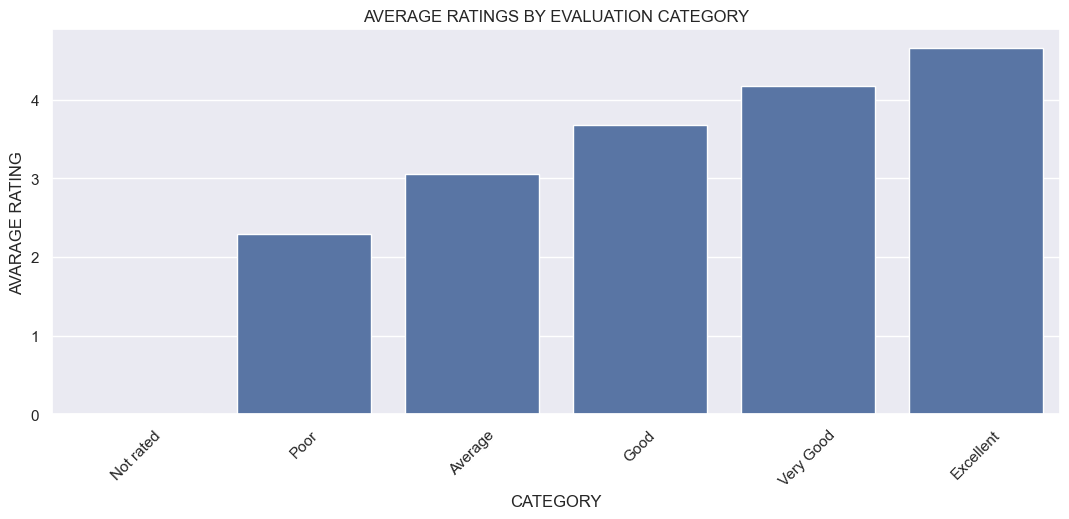

In [103]:
aux = df5.groupby(['rating_text'])['aggregate_rating'].mean().reset_index().sort_values(['aggregate_rating'], ascending = True)
sns.barplot(data = aux, x = 'rating_text', y = 'aggregate_rating')
plt.title('AVERAGE RATINGS BY EVALUATION CATEGORY')
plt.xlabel('CATEGORY')
plt.ylabel('AVARAGE RATING')
plt.xticks(rotation = 45)
plt.show()

### 5.2.2 - AVERAGE RATINGS BY TYPE OF DISH

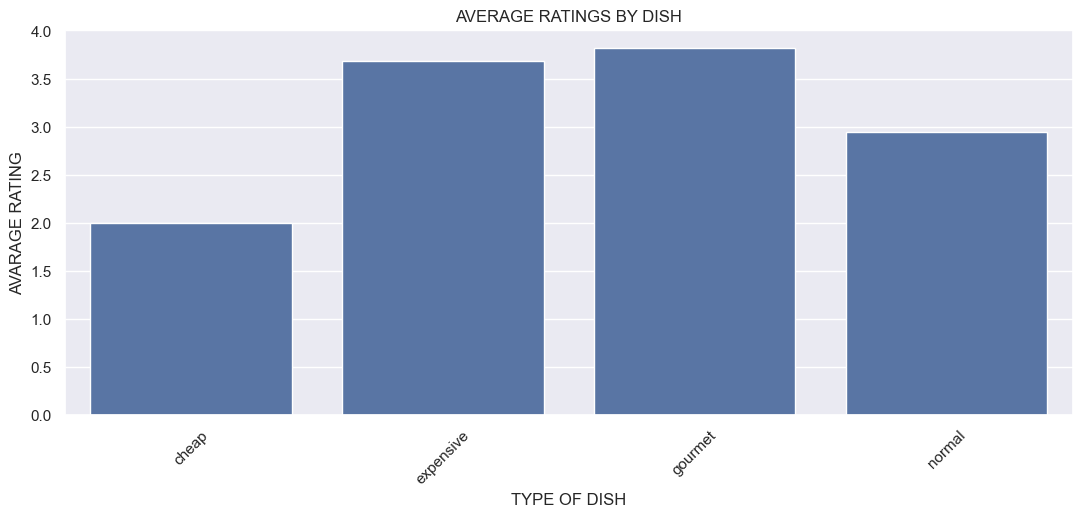

In [106]:
aux = df5.groupby(['price_range'])['aggregate_rating'].mean().reset_index()
sns.barplot(data = aux, x = 'price_range', y = 'aggregate_rating')
plt.title('AVERAGE RATINGS BY DISH')
plt.xlabel('TYPE OF DISH')
plt.ylabel('AVARAGE RATING')
plt.xticks(rotation = 45)
plt.show()

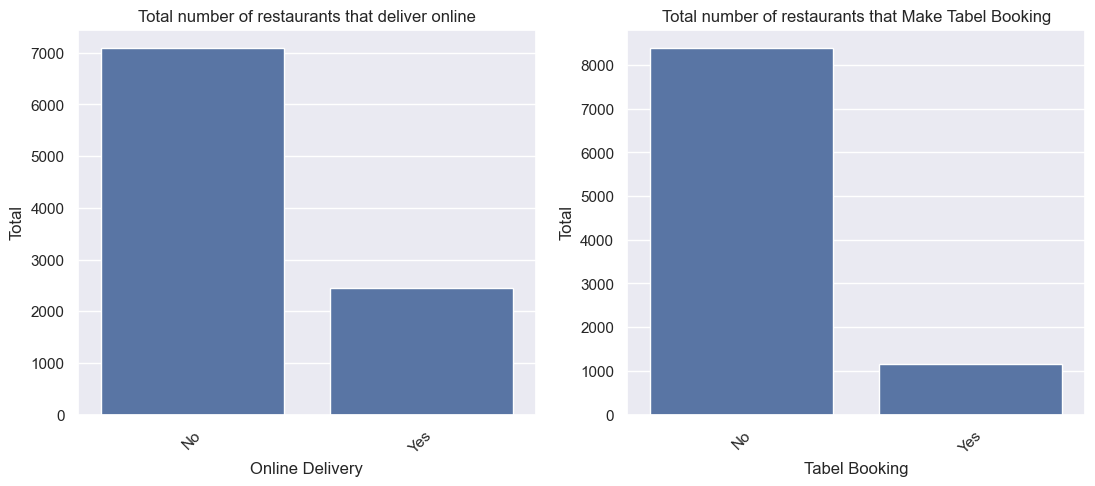

In [60]:
plt.subplot(1,2,1)
aux = df5.groupby(['has_online_delivery'])['restaurant_id'].count().reset_index()
sns.barplot(data = aux, x = 'has_online_delivery', y = 'restaurant_id')
plt.title('Total number of restaurants that deliver online')
plt.xlabel('Online Delivery')
plt.ylabel('Total')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
aux1 = df5.groupby(['has_table_booking'])['restaurant_id'].count().reset_index()
sns.barplot(data = aux1, x = 'has_table_booking', y = 'restaurant_id')
plt.title('Total number of restaurants that Make Tabel Booking')
plt.xlabel('Tabel Booking')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

In [69]:
df5['aggregate_rating'].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])